In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [5]:

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()


In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8)

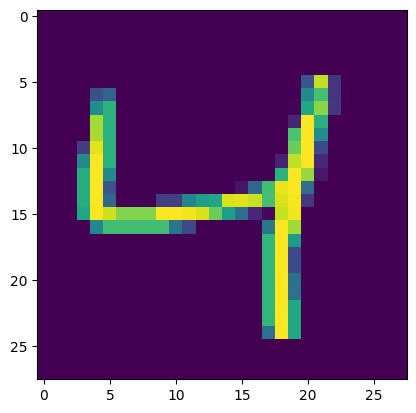

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [14]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step - accuracy: 0.9164 - loss: 0.2888 - val_accuracy: 0.9531 - val_loss: 0.1577
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.9634 - loss: 0.1232 - val_accuracy: 0.9647 - val_loss: 0.1167
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step - accuracy: 0.9750 - loss: 0.0843 - val_accuracy: 0.9691 - val_loss: 0.1076
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 688us/step - accuracy: 0.9807 - loss: 0.0623 - val_accuracy: 0.9680 - val_loss: 0.1059
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step - accuracy: 0.9852 - loss: 0.0471 - val_accuracy: 0.9712 - val_loss: 0.0964
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - accuracy: 0.9875 - loss: 0.0395 - val_accuracy: 0.9742 - val_loss: 0.0941
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step - accuracy: 0.9897 - loss: 0.0309 - val_accuracy: 0.9727 - val_loss: 0.1083
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step - accuracy: 0.9923 -

In [15]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step


In [16]:
y_pred = y_prob.argmax(axis=1)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9718

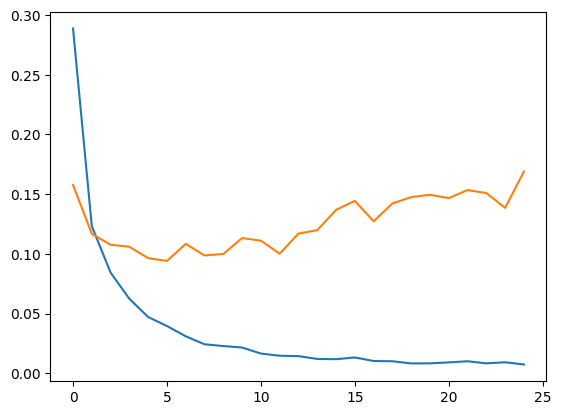

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

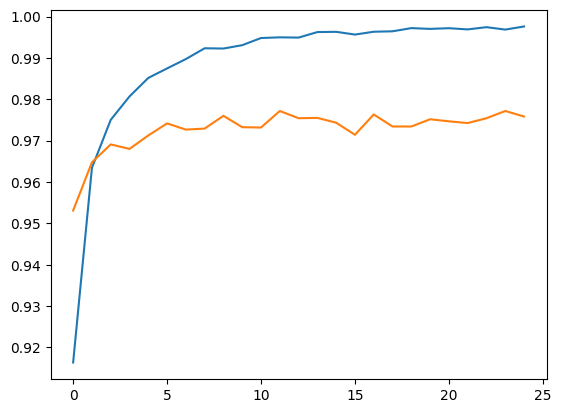

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

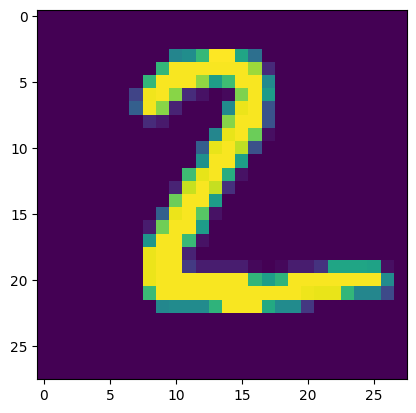

In [20]:
plt.imshow(X_test[1])

In [21]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([2])